# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-pastel')

import warnings
warnings.filterwarnings('ignore')


Beberapa pustaka Python yang diperlukan untuk analisis data pada proyek ini meliputi:
* **pandas** dan **numpy**: Untuk manipulasi dan komputasi data.
* **matplotlib** dan **seaborn**: Untuk visualisasi data yang komprehensif.
* **datetime**: Untuk bekerja dengan data tanggal, khususnya dalam perhitungan usia bangunan.

# **2. Load Data**

Dataset yang digunakan adalah data sintetis yang berisi 3.000 listing properti residensial yang dimodelkan seperti data penjualan rumah riil di Amerika Serikat (dalam format gaya Zillow).Setiap baris mewakili properti unik dan mencakup 16 fitur utama yang umum digunakan oleh agen real estat, investor, dan analis. Data ini mencakup beberapa negara bagian dan kota di AS, dengan nilai yang realistis untuk harga, luas persegi, jumlah kamar tidur/kamar mandi, tipe properti, dan banyak lagi.

**Sumber Dataset:** [USA House Sales Data by Abdul Wadood from Kaggle](https://www.kaggle.com/datasets/abdulwadood11220/usa-house-sales-data)

Dataset ini terdiri dari 16 fitur dengan detil sebagai berikut:
* Price: Harga properti dalam Dolar AS ($).
* Address: Alamat lengkap properti.
* City: Kota lokasi properti.
* Zipcode: Kode pos lokasi properti.
* State: Negara bagian di AS (contoh: CA).
* Bedrooms: Jumlah kamar tidur.
* Bathrooms: Jumlah kamar mandi.
* Area (Sqft): Luas bangunan dalam satuan kaki persegi.
* Lot Size: Luas tanah dalam satuan kaki persegi.
* Year Built: Tahun properti dibangun.
* Days on Market: Lama hari properti terdaftar di pasar.
* Property Type: Jenis properti (misma, Rumah Tunggal, Apartemen).
* MLS ID: Nomor identifikasi unik pada Multiple Listing Service.
* Listing Agent: Nama agen atau agensi penjual.
* Status: Status penjualan (misalnya, Dijual, Terjual).
* Listing URL: Tautan web menuju halaman listing.

In [2]:
file_path = 'us_house_Sales_data.csv'
df = pd.read_csv(file_path)

df.head(5)

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/


# **3. Analisis Statistik Deskriptif**

In [3]:
# Cek nilai yang hilang
print("Jumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

# Cek data duplikat
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")

Jumlah nilai yang hilang di setiap kolom:
Price             0
Address           0
City              0
Zipcode           0
State             0
Bedrooms          0
Bathrooms         0
Area (Sqft)       0
Lot Size          0
Year Built        0
Days on Market    0
Property Type     0
MLS ID            0
Listing Agent     0
Status            0
Listing URL       0
dtype: int64

Jumlah data duplikat: 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           3000 non-null   object
 1   Address         3000 non-null   object
 2   City            3000 non-null   object
 3   Zipcode         3000 non-null   int64 
 4   State           3000 non-null   object
 5   Bedrooms        3000 non-null   object
 6   Bathrooms       3000 non-null   object
 7   Area (Sqft)     3000 non-null   object
 8   Lot Size        3000 non-null   object
 9   Year Built      3000 non-null   int64 
 10  Days on Market  3000 non-null   int64 
 11  Property Type   3000 non-null   object
 12  MLS ID          3000 non-null   object
 13  Listing Agent   3000 non-null   object
 14  Status          3000 non-null   object
 15  Listing URL     3000 non-null   object
dtypes: int64(3), object(13)
memory usage: 375.1+ KB


In [5]:
def clean_numeric(val):
    return int(val.strip().replace("$", "").replace(",", "").replace(" sqft", "").replace(" bds", "").replace(" ba", ""))

df['Price'] = df['Price'].apply(clean_numeric)
df['Bedrooms'] = df['Bedrooms'].apply(clean_numeric)
df['Bathrooms'] = df['Bathrooms'].apply(clean_numeric)
df['Area (Sqft)'] = df['Area (Sqft)'].apply(clean_numeric)
df['Lot Size'] = df['Lot Size'].apply(clean_numeric)

In [6]:
df.describe()

,Price,Zipcode,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8.108594e+05,55264.197333,3.469667,2.501667,2278.950667,5499.022333,1986.814333,61.199333
std,3.997320e+05,25923.967932,1.706278,1.121792,977.406975,2628.573865,21.272252,34.890983
min,1.002830e+05,10006.000000,1.000000,1.000000,600.000000,1000.000000,1950.000000,1.000000
25%,4.703870e+05,33363.500000,2.000000,1.000000,1440.750000,3183.500000,1968.000000,31.000000
50%,8.156300e+05,55467.500000,3.000000,2.000000,2274.500000,5543.500000,1987.000000,62.000000
75%,1.158188e+06,77692.250000,5.000000,4.000000,3111.000000,7799.000000,2006.000000,91.000000
max,1.499473e+06,99955.000000,6.000000,4.000000,3999.000000,9996.000000,2023.000000,120.000000


Langkah ini dilakukan untuk memastikan kualitas dan konsistensi data sebelum analisis. Proses yang dilakukan meliputi:
1.  **Pemeriksaan Nilai Kosong & Duplikat**: Tidak ditemukan nilai kosong/hilang maupun data yang duplikat dalam dataset.
2.  **Pemeriksaan Tipe Data**: Menggunakan `.info()` untuk melihat tipe data dari setiap kolom dan mengidentifikasi kolom mana yang perlu diubah. Misalnya seperti `price`, `Area (sqft)`, dan beberapa fitur lainnya yang mestinya bertipe **numerik** namun dalam dataset default masih bertipe **object**
3.  **Pembersihan Kolom Numerik**: Pembuatan fungsi `clean_numeric` ditujukan untuk menghapus karakter non-numerik (seperti '$', ',', 'sqft') dari beberapa kolom dan mengubah tipe datanya menjadi integer agar bisa dianalisis secara matematis.
4.  **Statistik Deskriptif**: Menggunakan `.describe()` setelah pembersihan untuk melihat ringkasan statistik (rata-rata, standar deviasi, kuartil) dari data numerik. Dari statistik deskriptif ini juga dapat dianalisis apakah terdapat nilai yang anomali dalam dataset. Hasilnya, tidak ditemukan anomali pada setiap fitur numerik yang ada.
    * **Harga:** Rata-rata harga rumah adalah sekitar **$810,000**, dengan rentang yang sangat lebar mulai dari **$100,000** hingga **$1,5 juta**. Standar deviasi yang tinggi (~$400,000) mengonfirmasi adanya variasi harga yang besar.
    * **Atribut Properti:** Properti dalam dataset ini rata-rata memiliki **3-4 kamar tidur**, **2-3 kamar mandi**, dan luas bangunan sekitar **2278 sqft**.
    * **Usia Bangunan:** Usia properti sangat beragam, dengan tahun pembuatan dari **1950 hingga 2023**, menunjukkan pasar yang mencakup properti lama dan baru.
    * **Waktu di Pasar:** Rata-rata, sebuah properti membutuhkan waktu **61 hari** untuk berada di pasar.

# **4. Exploratory Data Analysis**

### Distribusi Harga Properti

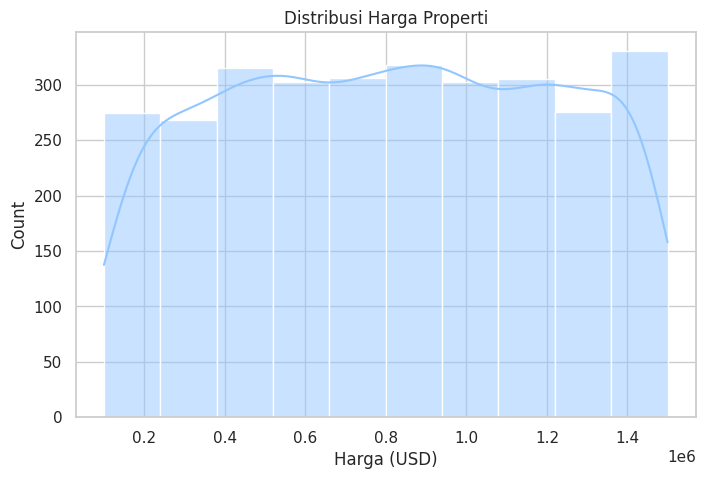

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=10)
plt.title("Distribusi Harga Properti")
plt.xlabel("Harga (USD)")
plt.show()

Distribusi harga cenderung **condong ke kanan (right-skewed)**. Ini berarti sebagian besar properti terkonsentrasi pada rentang harga yang lebih rendah hingga menengah, namun ada beberapa properti dengan harga sangat tinggi yang menjadi *outlier*.


### Plot antara Harga & Luas Bangunan untuk Setiap Kota

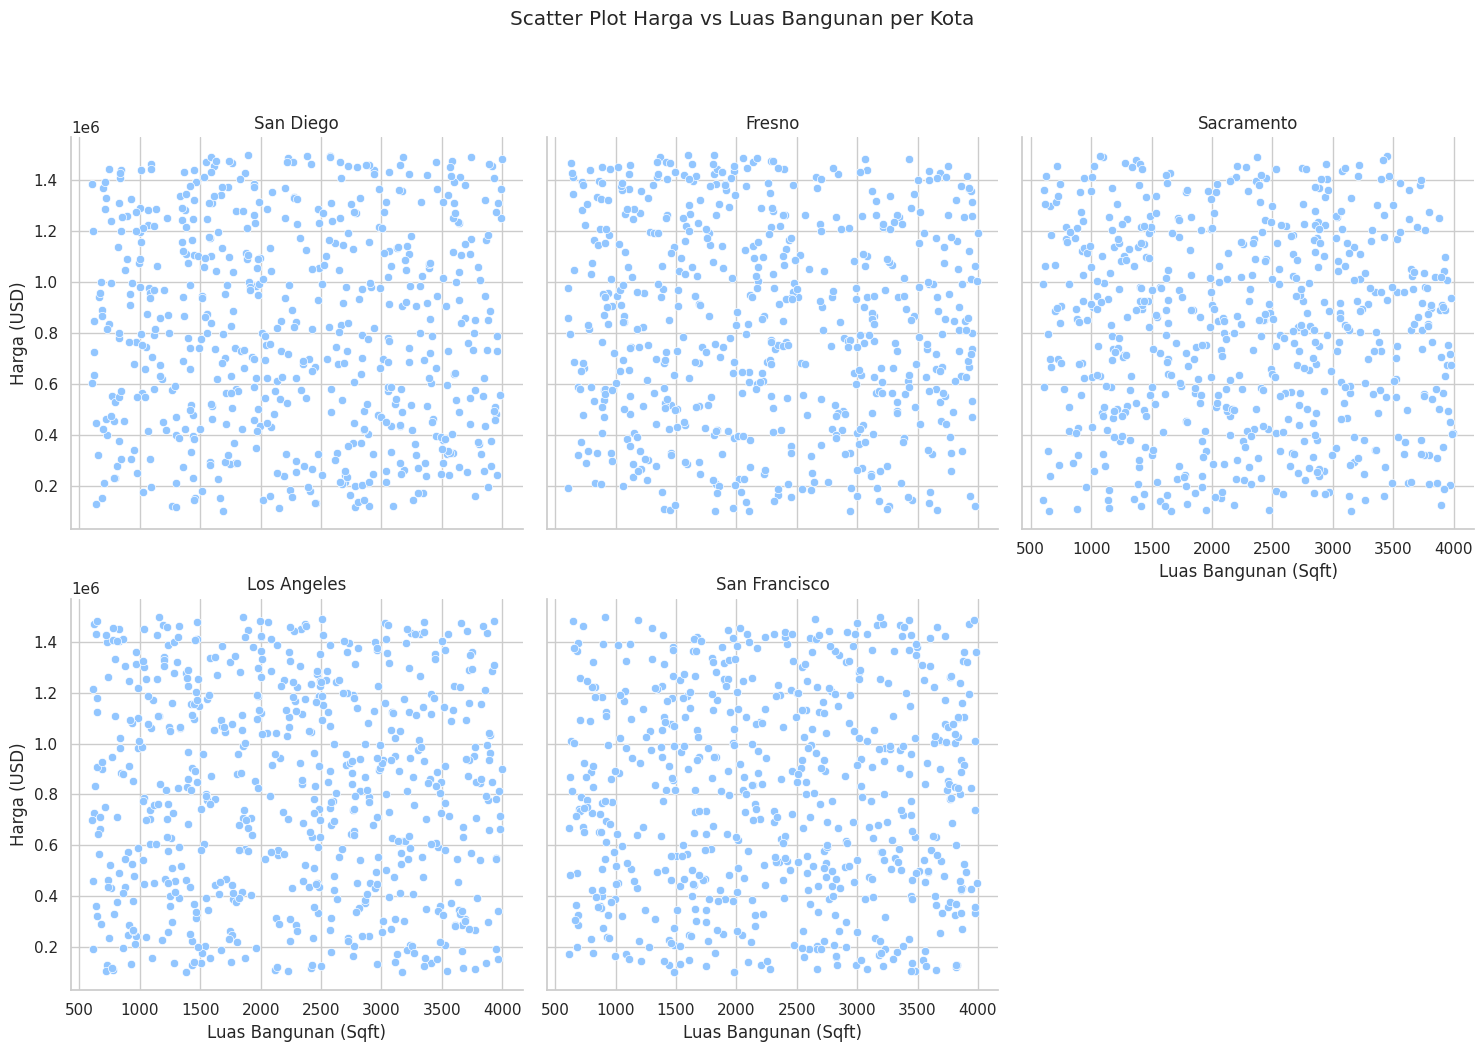

In [8]:
g = sns.FacetGrid(df, col="City", height=5, aspect=1, col_wrap=3)
g.map_dataframe(sns.scatterplot, x="Area (Sqft)", y="Price")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Luas Bangunan (Sqft)", "Harga (USD)")
g.fig.suptitle("Scatter Plot Harga vs Luas Bangunan per Kota", y=1.05)
plt.tight_layout()
plt.show()


**Hasil & Insight:**
* Tidak ada pola khusus antara luas bangunan dan harga bangunan. Hal ini telihat pada setiap plot yang ada untuk masing-masing kota titik-titiknya tersebaar merata.

### Rata-rata Harga Rumah per Kota

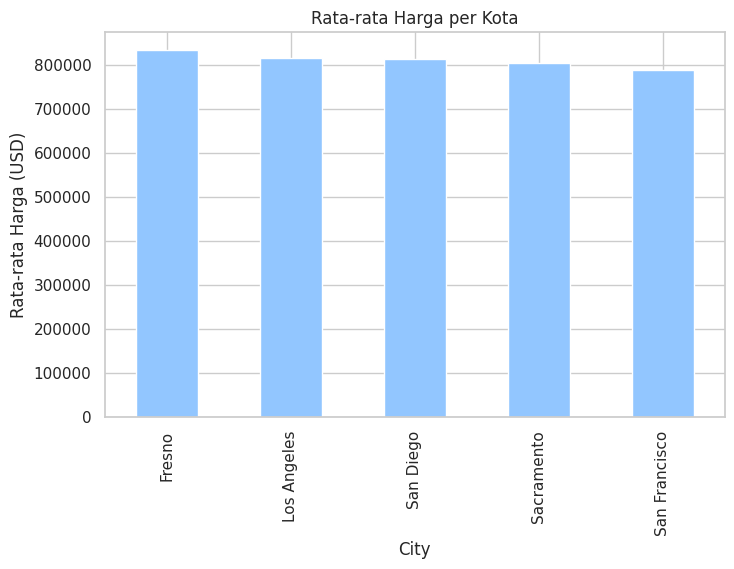

In [9]:
city_avg = df.groupby("City")['Price'].mean().sort_values(ascending=False)
city_avg.plot(kind='bar', figsize=(8,5), title="Rata-rata Harga per Kota")
plt.ylabel("Rata-rata Harga (USD)")
plt.show()


**Hasil & Insight:**
* Analisis ini dengan jelas menunjukkan adanya **disparitas harga berdasarkan lokasi** meskipun gapnya tidak terlalu besar.
* **Fresno** adalah kota dengan rata-rata harga properti termahal, diikuti oleh Los Angeles dan San Diego. Sebaliknya, kota seperti **Sacramento** dan **San Francisco** menawarkan harga yang lebih terjangkau.

### Distribusi Tipe Properti dalam Data

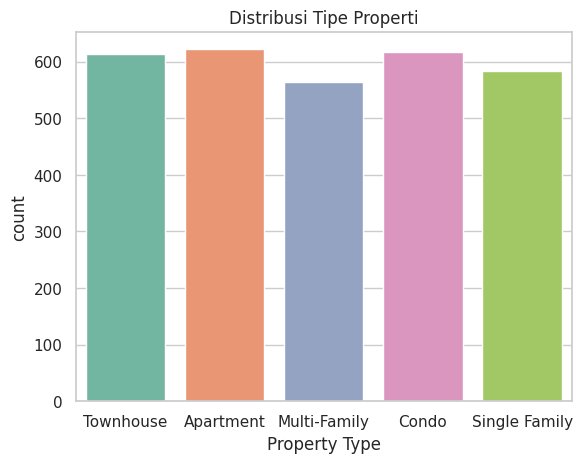

In [10]:
sns.countplot(data=df, x='Property Type', palette='Set2')
plt.title('Distribusi Tipe Properti')
plt.show()

* **Tipe Properti:** Pasar properti dalam dataset ini didominasi oleh **Apartment**. Ini menunjukkan bahwa mayoritas transaksi terjadi pada tipe hunian ini.

### Distribusi Status Properti

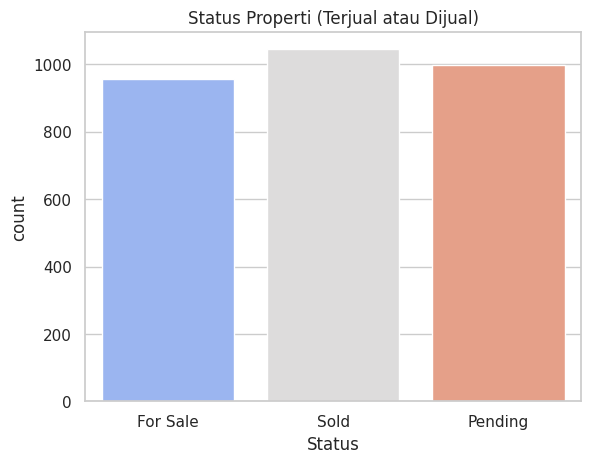

In [11]:
sns.countplot(data=df, x='Status', palette='coolwarm')
plt.title("Status Properti (Terjual atau Dijual)")
plt.show()


* **Status Properti:** Distribusi antara properti yang 'Dijual', 'Terjual', dan 'Pending' memiliki sedikit perbedaan namun tidak signifikan (tertinggi statusnya `Sold`). Ini menandakan dataset ini representatif untuk menganalisis siklus penjualan properti.

### Tren Pasar Berdasarkan Usia Bangunan

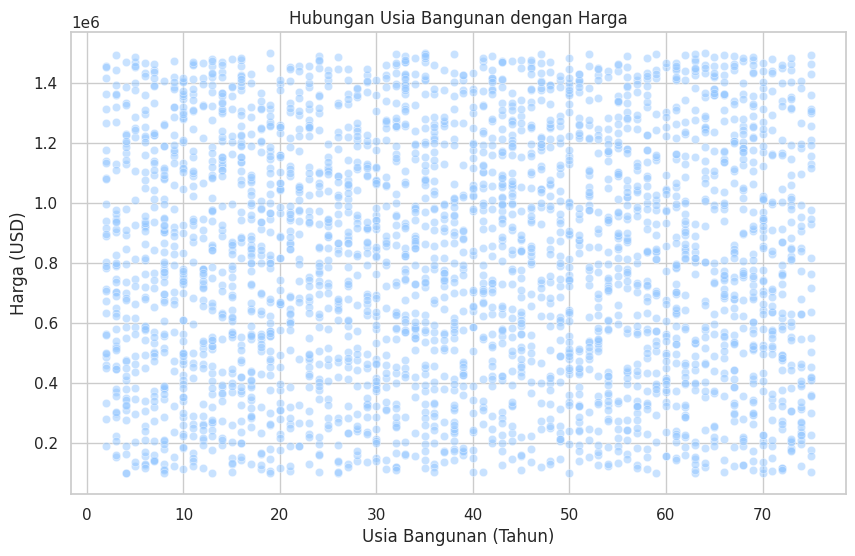

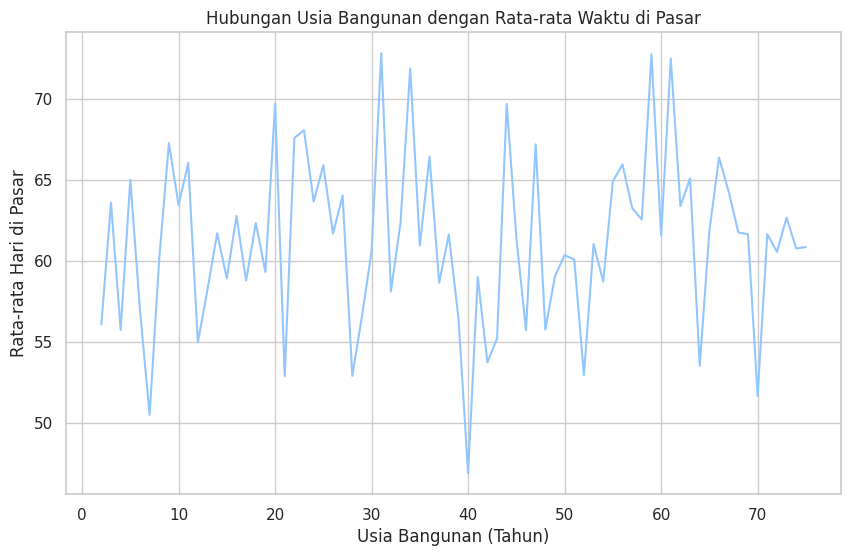

In [ ]:
current_year = datetime.now().year
df['Building Age'] = current_year - df['Year Built']

# Hubungan antara Usia Bangunan dan Harga
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Building Age', y='Price', alpha=0.5)
plt.title('Hubungan Usia Bangunan dengan Harga')
plt.xlabel('Usia Bangunan (Tahun)')
plt.ylabel('Harga (USD)')
plt.show()

# Hubungan antara Usia Bangunan dan Waktu di Pasar
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Building Age', y='Days on Market', errorbar=None)
plt.title('Hubungan Usia Bangunan dengan Rata-rata Waktu di Pasar')
plt.xlabel('Usia Bangunan (Tahun)')
plt.ylabel('Rata-rata Hari di Pasar')
plt.show()

**Hasil & Insight:**
* **Usia vs. Harga:** Tidak ada hubungan linear yang jelas. Properti baru tidak secara otomatis lebih mahal. Banyak properti tua yang memiliki harga tinggi, yang mungkin disebabkan oleh faktor lain seperti lokasi premium atau telah direnovasi.
* **Usia vs. Waktu di Pasar:** Tidak ada pola signifikan pula dalam hal usia bangunan dan waktu bangunan tersebut di pasar. Hal ini terlihat jelas pada grafik.

### Analisis Performa Agen

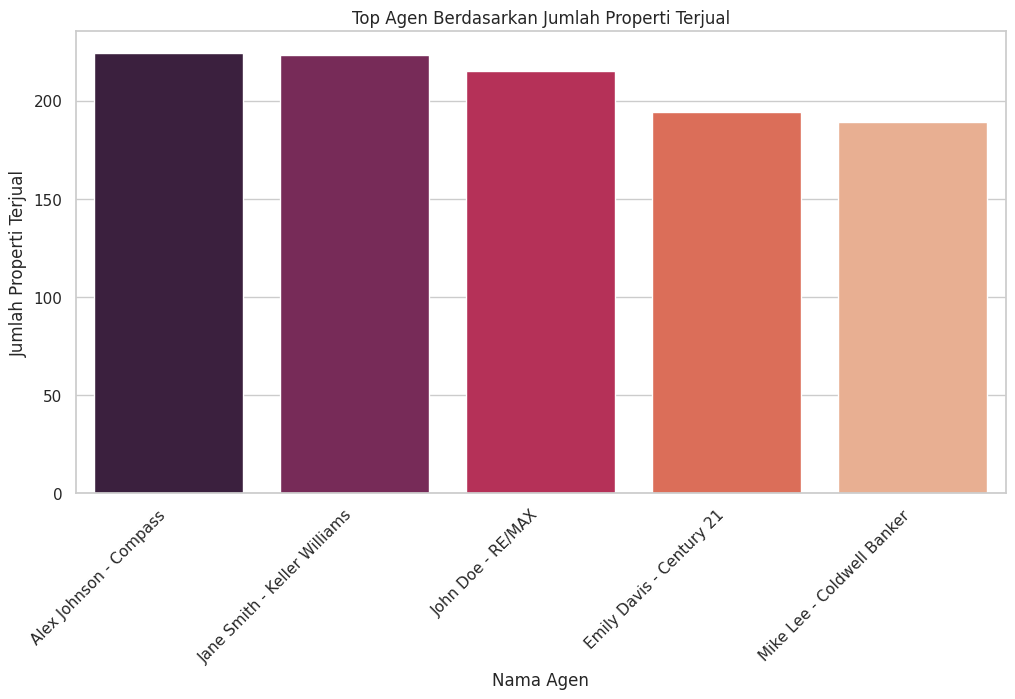

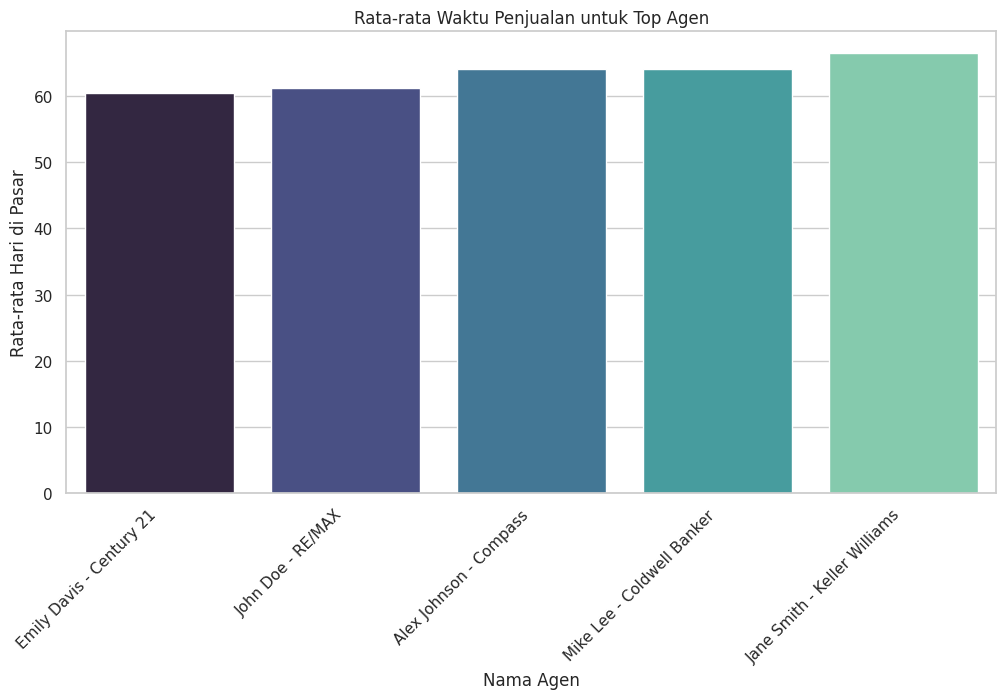

In [14]:
# Filter hanya untuk properti yang terjual
df_sold = df[df['Status'] == 'Sold'].copy()

# Top 10 Agen Berdasarkan Jumlah Properti Terjual
plt.figure(figsize=(12, 6))
top_agents_sold = df_sold['Listing Agent'].value_counts().nlargest(10)
sns.barplot(x=top_agents_sold.index, y=top_agents_sold.values, palette='rocket')
plt.title('Top Agen Berdasarkan Jumlah Properti Terjual')
plt.xlabel('Nama Agen')
plt.ylabel('Jumlah Properti Terjual')
plt.xticks(rotation=45, ha='right')
plt.show()

# Rata-rata waktu penjualan untuk top 10 agen
top_agent_names = top_agents_sold.index.tolist()
df_top_agents_sold = df_sold[df_sold['Listing Agent'].isin(top_agent_names)]

plt.figure(figsize=(12, 6))
agent_dom = df_top_agents_sold.groupby('Listing Agent')['Days on Market'].mean().sort_values()
sns.barplot(x=agent_dom.index, y=agent_dom.values, palette='mako', order=agent_dom.index)
plt.title('Rata-rata Waktu Penjualan untuk Top Agen')
plt.xlabel('Nama Agen')
plt.ylabel('Rata-rata Hari di Pasar')
plt.xticks(rotation=45, ha='right')
plt.show()

**Hasil & Insight:**
* **Volume Penjualan:** Agen **Alex Jhonson - Compass** menunjukkan **volume penjualan tertinggi**, menjadikannya agen paling produktif dalam dataset ini.
* **Efisiensi Penjualan:** Meskipun Alex Jhonson menjual paling banyak, agen seperti **Emily Davis** memiliki **rata-rata waktu penjualan (Days on Market) yang lebih singkat**. Ini bisa mengindikasikan strategi penetapan harga yang lebih efektif atau jaringan pembeli yang lebih kuat. Analisis ini membedakan antara agen yang produktif dan agen yang efisien.